In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
db = pd.read_csv('diabetes.csv')

In [4]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [7]:
correlation_matrix = db.corr()

In [8]:
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


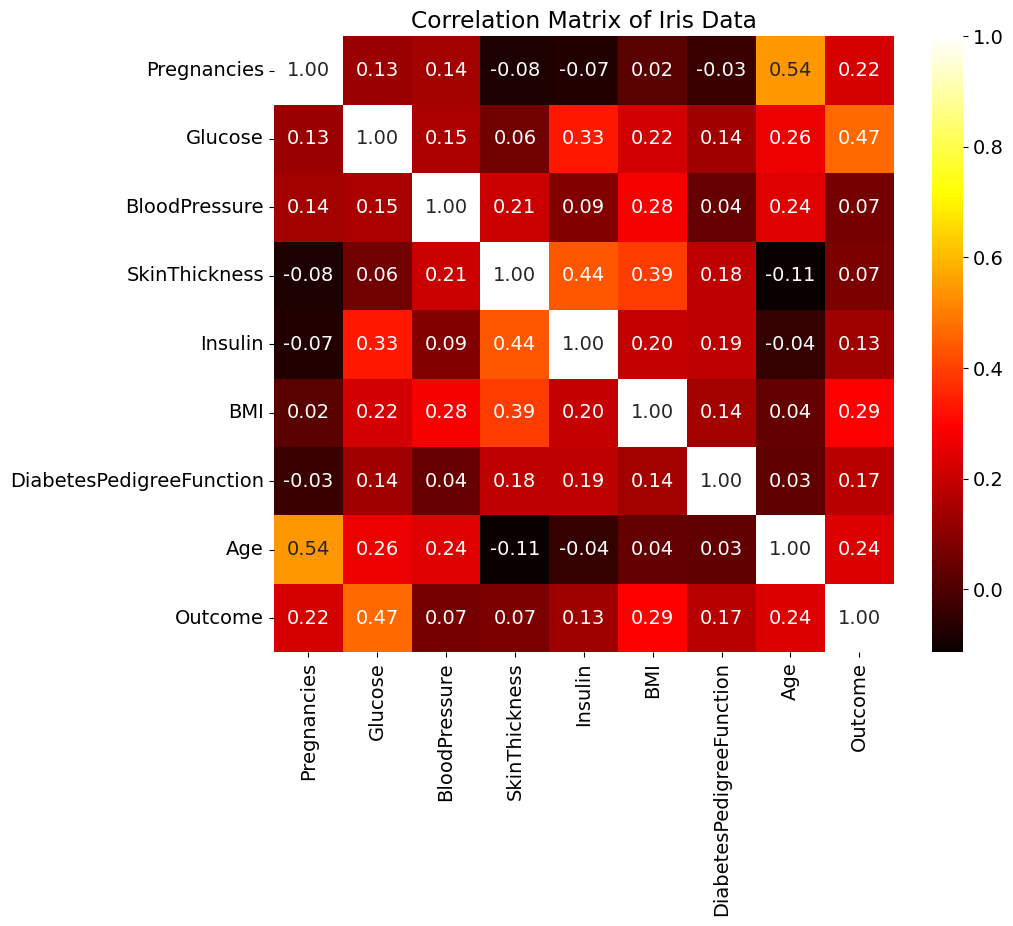

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt=".2f")
plt.title('Correlation Matrix of Iris Data')
plt.show()

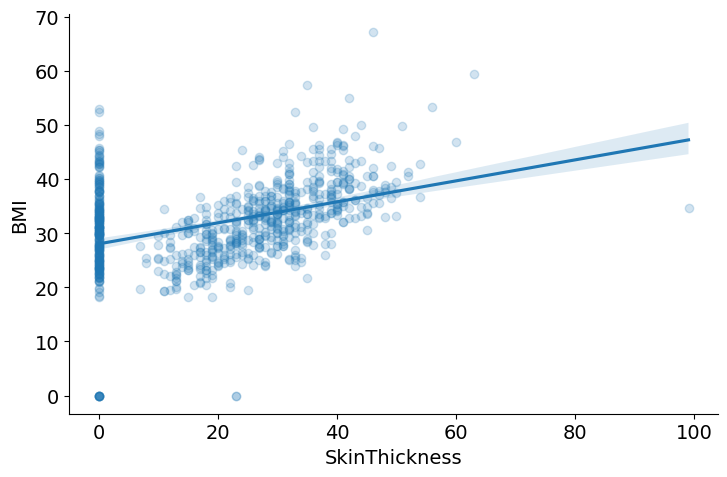

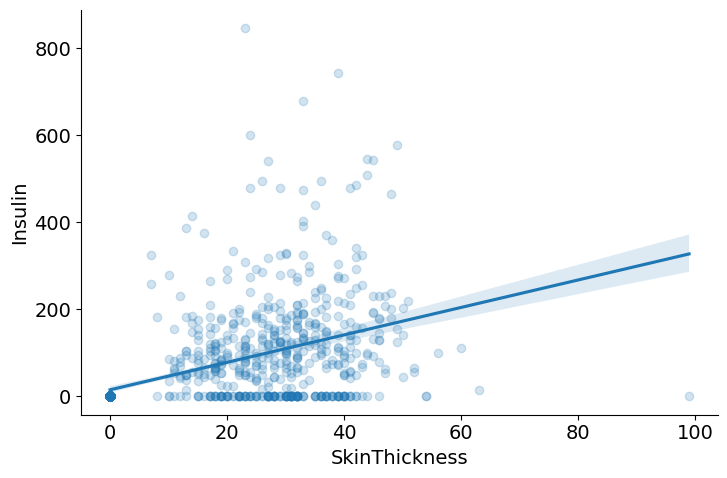

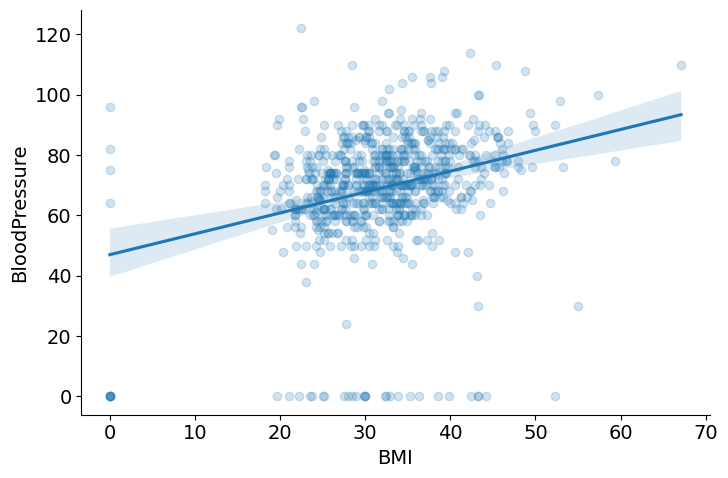

In [11]:
# Scatterplot with best fit line to explore relation b/w independent & dependent variables

a=sns.lmplot(x='SkinThickness', y='BMI', data = db, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='SkinThickness', y='Insulin', data = db, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='BMI', y='BloodPressure', data = db, aspect=1.5, scatter_kws={'alpha':0.2})

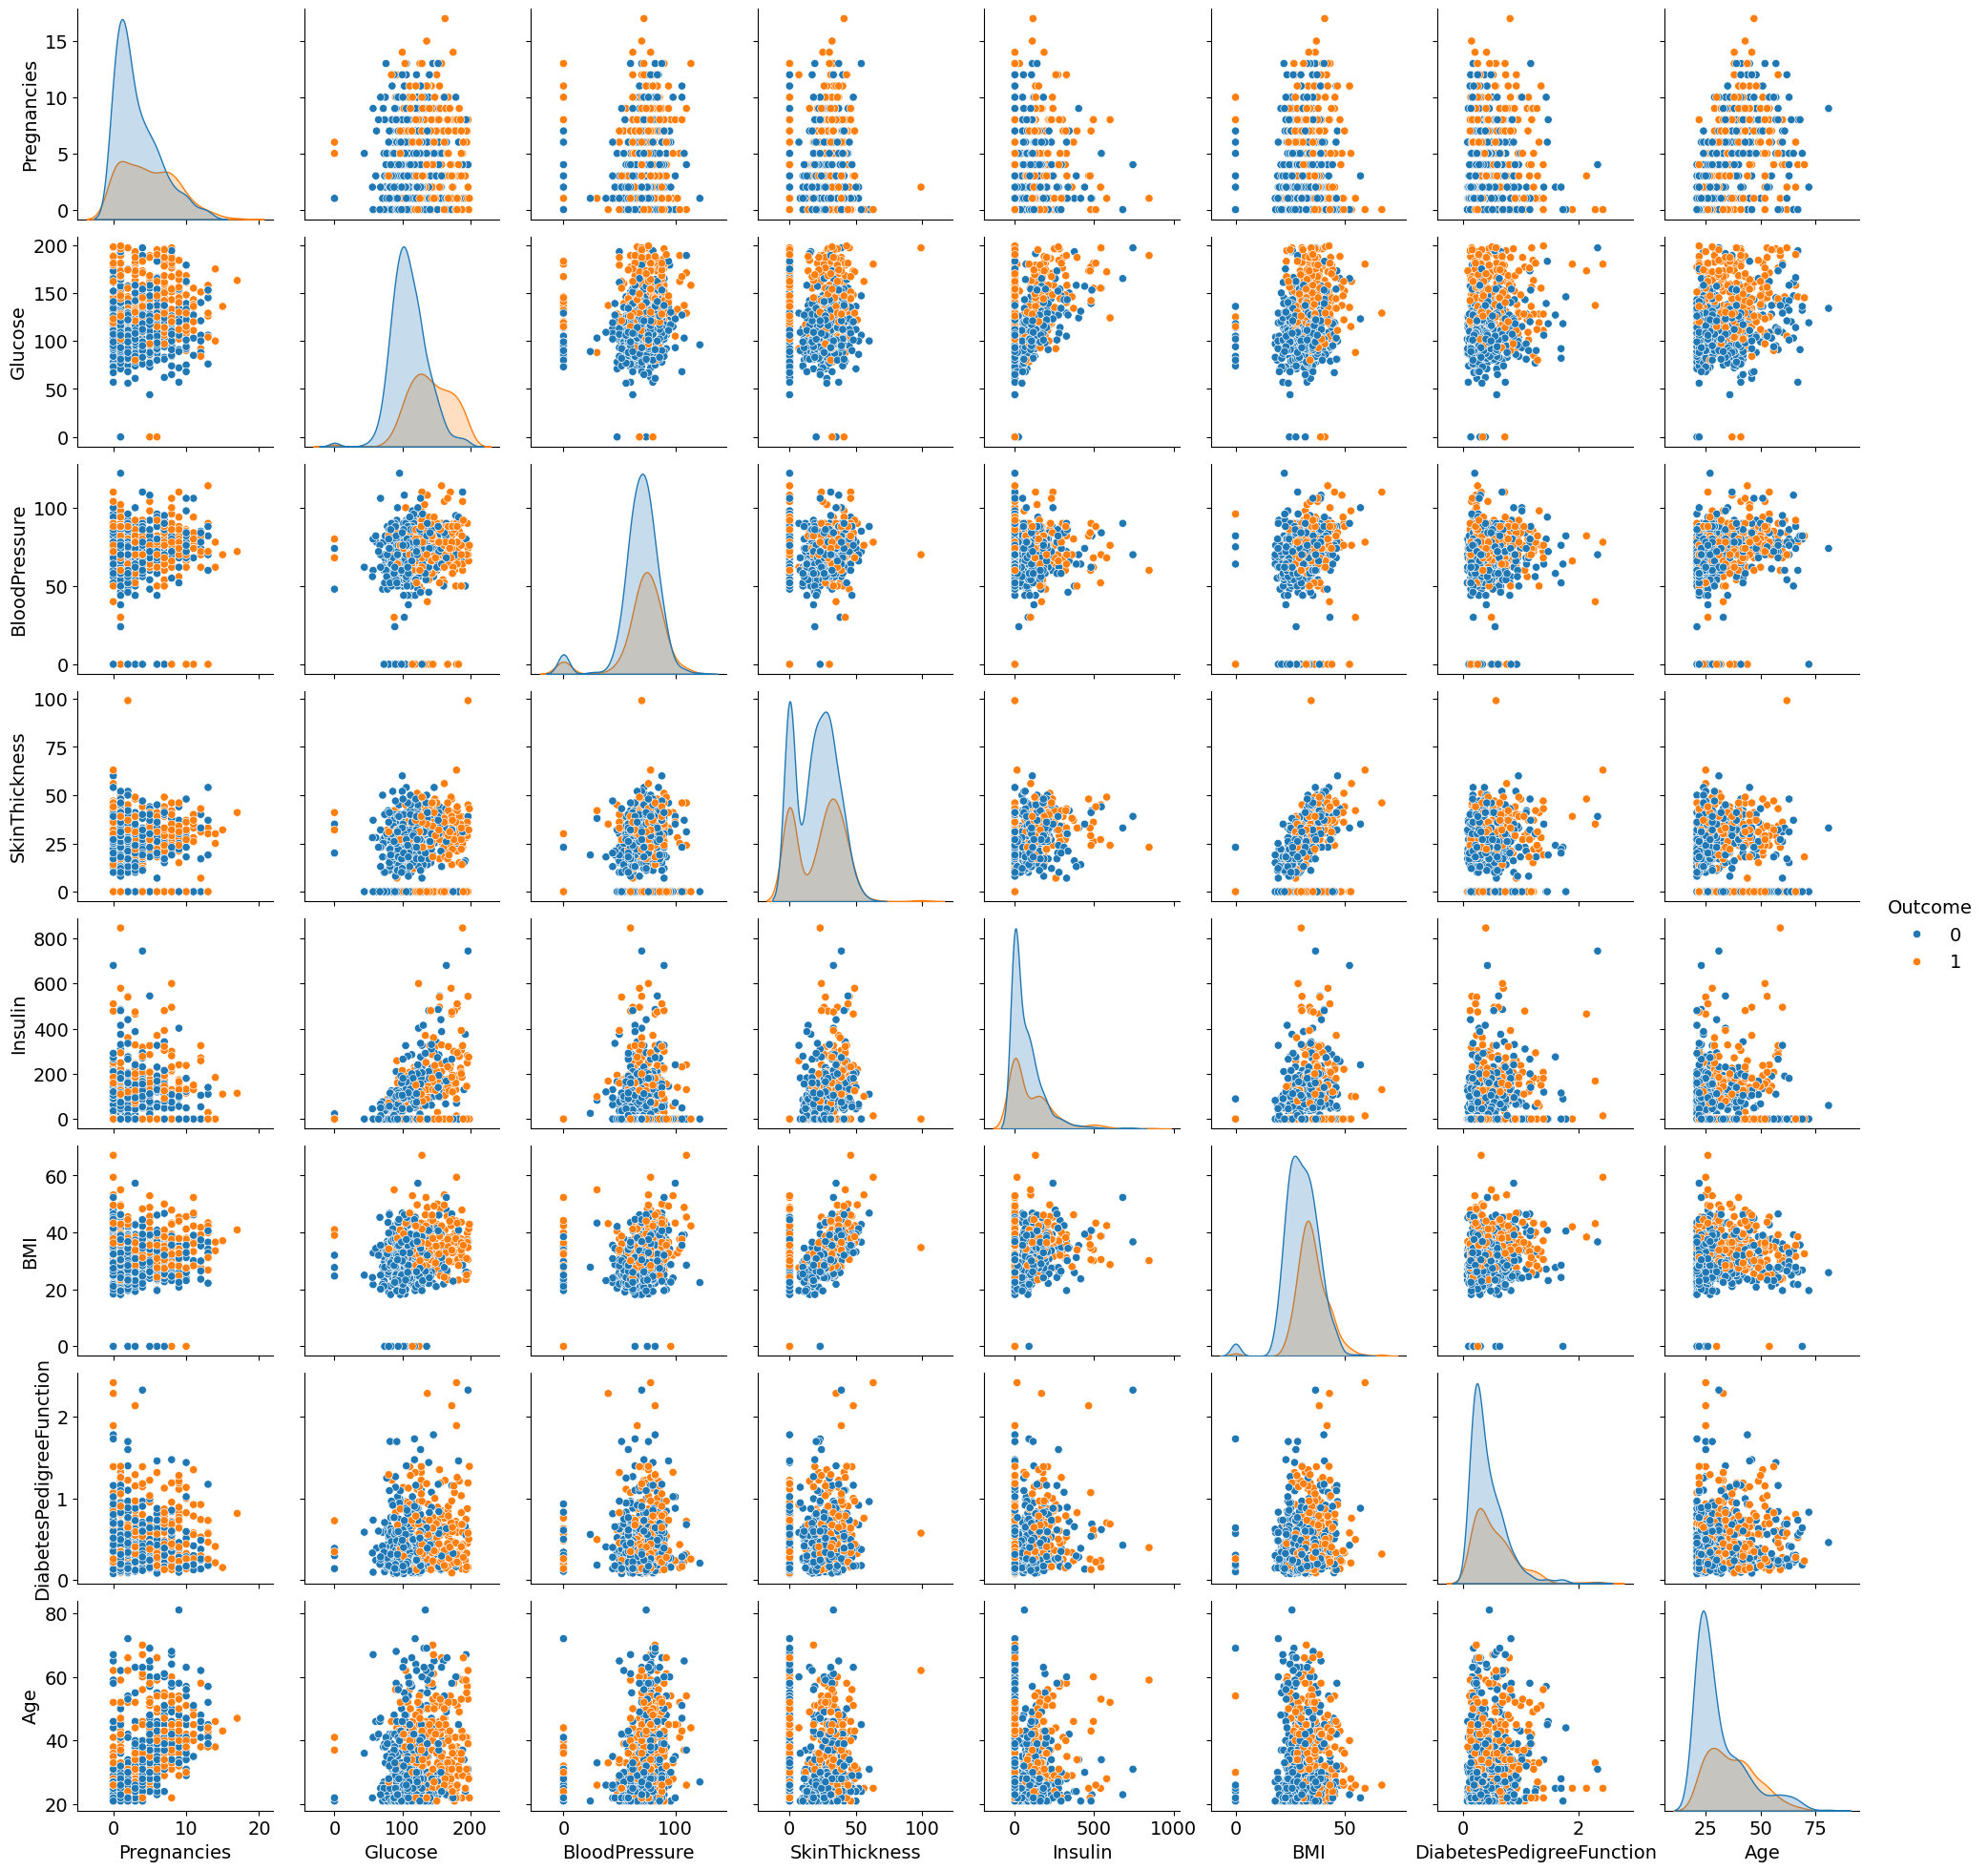

In [13]:
scatterplot=sns.pairplot(db,hue="Outcome")

In [14]:
input_cols = ['BloodPressure', 'BMI', 'Insulin']
output_variable = ['Outcome']
X = db[input_cols]
y = db[output_variable]
y=db['Outcome']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [16]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

In [17]:
print ('R-Squared for training dataset model:', model.score(X_train,y_train))

print('\n')

R-Squared for training dataset model: 0.0892661429452859




In [22]:
y_train_pred = model.predict(X_train)

In [27]:
print ('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print ('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

MAE: 0.41528101613724094
MSE: 0.20513295632823839
RMSE: 0.4529160588102815


In [28]:
predicted = model.predict(X_test)

In [29]:
print(metrics.r2_score(y_test,predicted))

0.08931717018683127


In [30]:
print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.4181767121557427
MSE: 0.21073652260139442
RMSE: 0.45906047815227397
